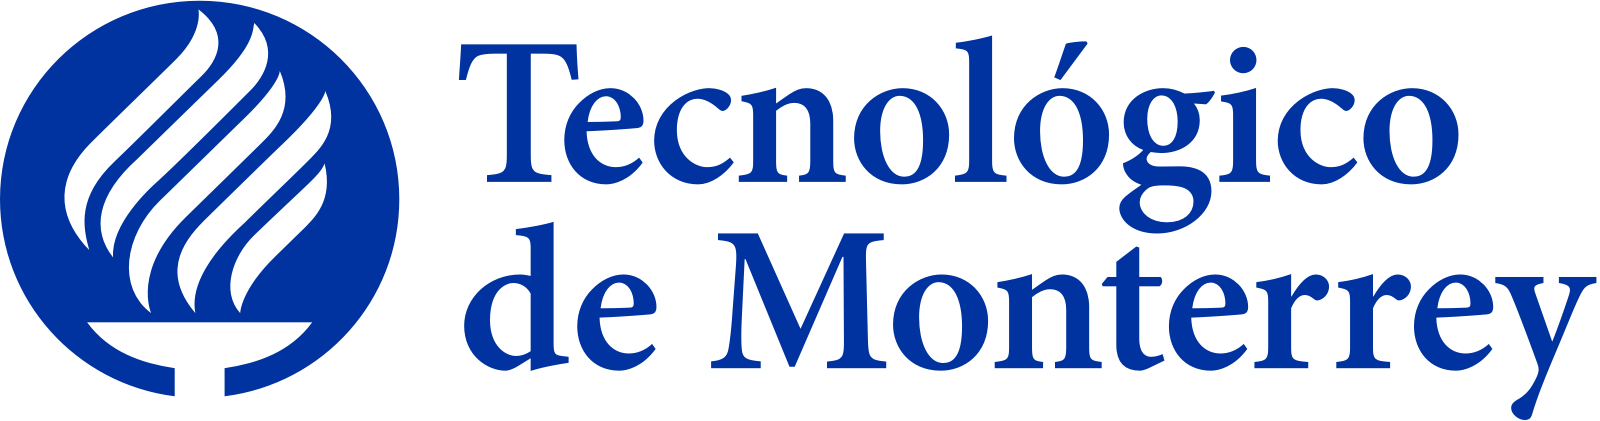

#**Maestría en Inteligencia Artificial Aplicada**

**Asignatura:** Ciencia y analítica de datos

**Profesor Titular:** Jobish Vallikavungal Devassia - María de la Paz Rico Fernández

**Tema:** Análisis de datos con Python - Curso IBM

**Semana:** Semana Ocho - Módulo 5

**Estudiante:** 
* Henry Junior Aranzales Lopez - Matrícula: A01794020

#**Generalidades del módulo 4: Análisis exploratorio de 

*   Elemento de la lista
*   Elemento de la lista

datos con Python**

## **Objetivo**

Definir los contenidos y tematicas relevantes para entender los pilares sobre la evaluación de modelos.

* Evaluación de modelos
* Regresión de cresta de sobreajuste
* Subajuste y selección de modelos
* Búsqueda en cuadrícula



#**Tema 1: Evaluación del modelo**

La Evaluacion del Modelo es una parte integral del proceso de desarrollo de un modelo. Ayuda a encontrar el mejor modelo que representa a nuestros datos y cuan bien puede el modelo seleccionado funcionar en el futuro. 

Evaluar la performance de un modelo con los datos utilizados para el entrenamiento no es algo aceptable en la ciencia de datos porque facilmente puede generar modelos demasiado optimistas o sobreexplotados (overfitting). Hay dos metodos para evaluar modelos en data science, Hold-Out y Cross-Validation. Para evitar sobreexplotar un modelo, ambos metodos utilizan un conjunto de pruebas (este conjunto de datos no debe haber sido visto anteriormente por el modelo) para poder evaluar la performance del modelo.

## Hold-Out

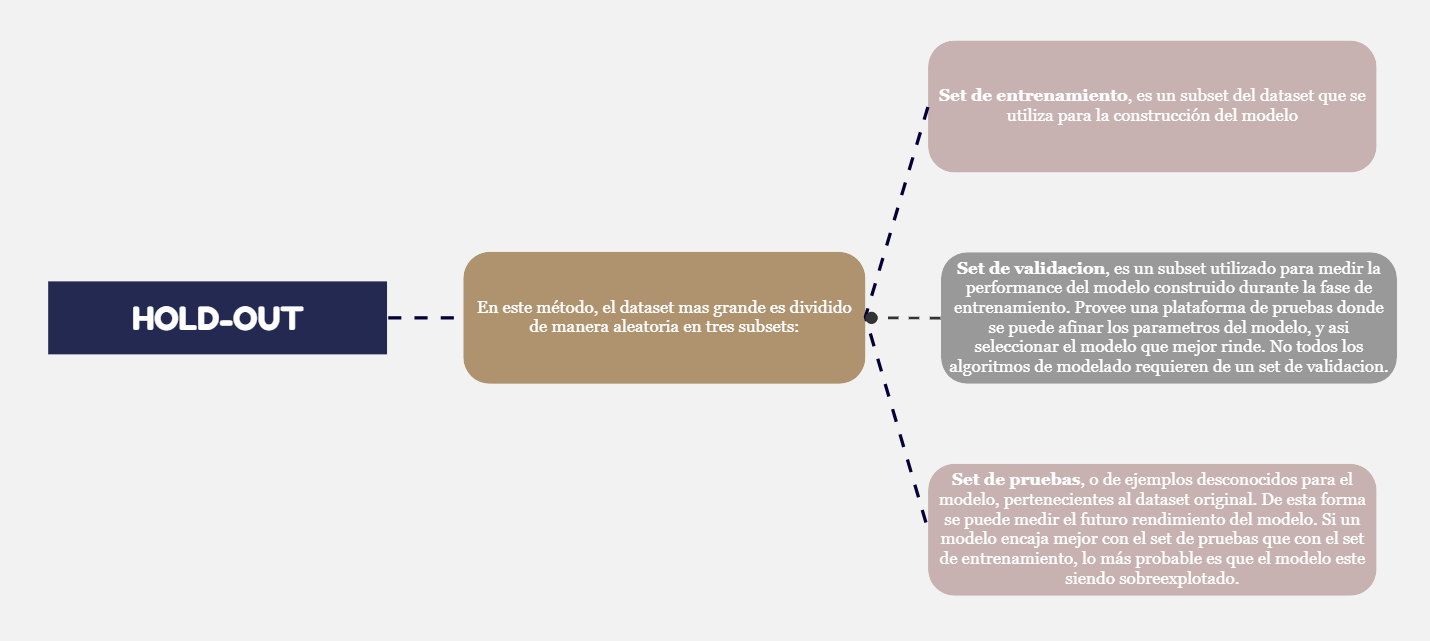

## Cross-Validation

Cuando solo se posee un conjunto limitado de datos, para lograr un estimado imparcial del modelo utilizamos algo llamado k-fold cross-validation. En este k-fold cross-validation, dividimos los datos en k subsets de igual tamaño. Construimos modelos k veces, cada vez dejando afuera a uno de los subsets del entrenamiento y lo utilizamos como set de pruebas. Si k es igual al tamaño del sampleo de datos, se llama “leave-one-out” (dejar ir)

La evaluacion del modelo se puede dividir en dos secciones:

* Evaluacion por Clasificacion
* Evaluacion por Regresion

Nota:  Esta métrica es la más efectiva para el uso de los datos, ya que cada observación dada es utilizada tanto en el conjunto de entrenamiento como en el de validación.

## Proceso de evaluación

La evaluación del modelo es útil para saber como se desempeña nuestro modelo en la vida real. Una manera efectiva de realizar esta evaluación es dividiendo nuestros datos en un set de entrenamiento y otro de prueba.

La evaluación en la muestra nos dice qué tan bien nuestro modelo se ajusta a los datos ya entregados para entrenamiento, sin embargo no nos da una estimación de qué tan bien el modelo entrenado puede predecir nuevos datos.

La solución es dividir nuestros datos, usar los datos de muestra o los datos de entrenamiento para entrenar el modelo, y en python lo podemos hacer a través de la función de sci-kit learn train_test_split()

Nota: Se debe tener en cuenta que el resto de los datos denominados datos de prueba se utilizan como datos fuera de la muestra.

In [ ]:
x_train, x_test, y_train, y_test = tran_test_split(x_data, y_data, test_size= 0,3, random_state=0)

# Donde:
  # x_data = Lista de variables predictorias
  # y_data = Variable objetivo 
  # x_train y y_train: partes de los datos disponibles como conjunto de entrenamiento
  # x_test y y_test: partes de los datos disponibles como conjunto de prueba
  # test_size: Tamaño de prueba

Con ayuda de cross-validation, podemos tener resultados del performance aún más acertados. Esto se hace dividiendo el set de datos varias veces para realizar varias pruebas de entrenamiento/validación y tener un promedio de la evaluación. En python, lo podemos hacer de la siguiente manera:

In [ ]:
scores = cross_val_score(lr, x_data, y_data, cv=3)
np.mean(scores)

Si queremos hacer un proceso similar, pero obtener las predicciones de cada split en lugar de las métricas, podemos usar cross_val_predict:

In [ ]:
y_hat = corss_val_predict(lr, x_data, y_data, cv=3)

## Funciones

Score Cross-Validation: Esta métrica es la más efectiva para el uso de los datos, ya que cada observación dada es utilizada tanto en el conjunto de entrenamiento como en el de validación.

In [ ]:
#Llamamos la librería que contiene la métrica
from sklearn.model_selection import cross_val_score

#Ejecutamos la función indicándole el modelo 'RL', la variable de entrada, la variable de salida y las particiones (Folds) que queremos usar en las iteraciones
Score_Cross = cross_val_score(RL, X, Y, cv=4)

#Imprimimos la métrica obtenida
print("A continuación observaremos en el arreglo, el promedio del score R^2 por cada pliegue:")
Score_Cross

print("El promedio de los pliegues es", Score_Cross.mean(), "y la desviación estandar fue" , Score_Cross.std())

Predict Cross-Validation: Esta función nos permite predecir la salida, dividiendo el conjunto de datos en el número de pliegues especificado, tomando uno para validación y el resto para entrenamiento. La predicción devuelta corresponde a cada elemento obtenido en el pliegue de validación.

In [ ]:
#Importamos el método de la librería sklearn
from sklearn.model_selection import cross_val_predict

#Ejecutamos la predicción con 4 pliegues
Y_Pred = cross_val_predict(RL, X, Y, cv=4)

print("Las predicciones encontradas según los datos enviados son:", Y_Pred[0:5])

#**Tema 2: Sobre-Entrenamiento, Sub-Entrenamiento Y Selección Del Modelo:**

Para garantizar una adecuada selección de nuestro modelo, debemos garantizar que este no se encuentre sobre-entrenado ni sub-entrenado con los datos de validación y pruebas, en aras de que pueda estar preparado para utilizarse con data del mundo real.

Cuando hablamos del modelo de aprendizaje automático, en realidad hablamos de qué tan bien funciona y su precisión, lo que se conoce como errores de predicción. Consideremos que estamos diseñando un modelo de aprendizaje automático. Se dice que un modelo es un buen modelo de aprendizaje automático si generaliza cualquier dato de entrada nuevo del dominio del problema de una manera adecuada. Esto nos ayuda a hacer predicciones sobre datos futuros, que el modelo de datos nunca ha visto. Ahora, supongamos que queremos comprobar qué tan bien nuestro modelo de aprendizaje automático aprende y generaliza a los nuevos datos. Para eso, tenemos sobreajuste y mal ajuste, que son los principales responsables del bajo rendimiento de los algoritmos de aprendizaje automático.

* Predisposición: Suposiciones hechas por un modelo para hacer que una función sea más fácil de aprender. En realidad, es la tasa de error de los datos de entrenamiento. Cuando la tasa de error tiene un valor alto, lo llamamos sesgo alto y cuando la tasa de error tiene un valor bajo, lo llamamos sesgo bajo.

* Varianza: La diferencia entre la tasa de error de los datos de entrenamiento y los datos de prueba se denomina varianza. Si la diferencia es alta, entonces se llama alta varianza y cuando la diferencia de errores es baja, entonces se llama baja varianza. Por lo general, queremos hacer una varianza baja para generalizar nuestro modelo.

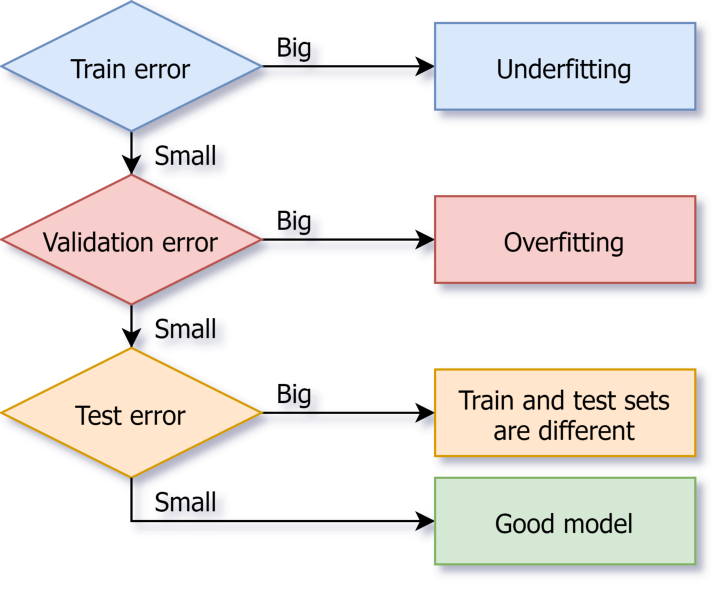

# Sub-Ajuste:

Se dice que un modelo estadístico o un algoritmo de aprendizaje automático tienen un ajuste insuficiente cuando no puede capturar la tendencia subyacente de los datos, es decir, solo funciona bien en los datos de entrenamiento pero funciona mal en los datos de prueba. 

En pocas palabras, Underfitting se refiere a un modelo que no puede funcionar bien en los datos de entrenamiento ni generalizarse a nuevos datos.


**Razones parael mal ajuste:**

* Alto sesgo y baja varianza
* El tamaño del conjunto de datos de entrenamiento utilizado no es suficiente.
* El modelo es demasiado simple.
* Los datos de entrenamiento no se limpian y también contienen ruido.


**Técnicas para reducir el desajuste:**

* Aumentar la complejidad del modelo
* Aumentar el número de características, realizando ingeniería de características
* Eliminar el ruido de los datos.
* Aumentar el número de épocas o aumentar la duración del entrenamiento para obtener mejores resultados.

# Sobre-Ajuste:

Se dice que un modelo estadístico está sobreajustado cuando el modelo no hace predicciones precisas sobre los datos de prueba. Cuando un modelo se entrena con tantos datos, comienza a aprender del ruido y las entradas de datos inexactas en nuestro conjunto de datos. Y cuando se prueba con datos de prueba resulta en Alta varianza.

En pocas palabras, el sobreajuste es un problema en el que la evaluación de los algoritmos de aprendizaje automático en los datos de entrenamiento es diferente de los datos no vistos.


**Razones parael mal ajuste:**

*  Alta varianza y bajo sesgo
*  El modelo es demasiado complejo
*  El tamaño de los datos de entrenamient


**Técnicas para reducir el desajuste:**

*  Aumentar los datos de entrenamiento.
*  Reduzca la complejidad del modelo.
*  Parada temprana durante la fase de entrenamiento (tenga un ojo sobre la pérdida durante el período de entrenamiento tan pronto como la pérdida comience a aumentar el entrenamiento de parada).
*  Regularización de crestas y regularización de lazos
*  Utilice la caída de las redes neuronales para abordar el sobreajuste.

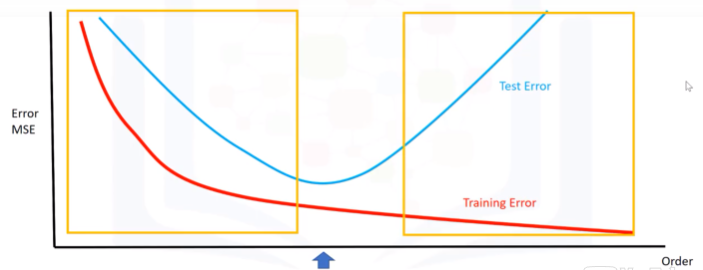

Para construir modelos de diferentes grados y evaluarlos, podemos hacer lo siguiente:

In [ ]:
Rsqu_test = []
order = [1,2,3,4]

for n in order:
  pr = PolynomialFeatures(degree=n)
  x_train_pr = pr.fit_transform(x_train[['horsepower']])
  x_test_pr = pr.fit_transform(x_test[['horsepower']])
  lr.fit(x_train, y_train)
  Rsqu_test.append(lr.score(x_test_pr, y_test))

#**Tema 3: Regresión de cresta**

La regresión de la cresta aborda algunos de los problemas de los mínimos cuadrados imponiendo una penalización sobre el tamaño de los coeficientes. Los coeficientes de cresta minimizan una suma residual penalizada de cuadrados.

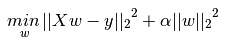

Aquí, alpha >0 es un parámetro de complejidad que controla la cantidad de encogimiento: cuanto mayor es el valor de alfa, mayor es la cantidad de encogimiento y por lo tanto los coeficientes se vuelven más robustos a la colinearidad.

Al igual que con otros modelos lineales, la regresión de cresta tomará en su método de ajuste las matrices X, y y guardará los coeficientes w del modelo lineal en su miembro coef_.

Para prevenir el over-fitting, podemos usar Ridge Regression, el cual controla la magnitud de los coeficientes polinomiales a través de un parámetro alpha.

Para hacer una predicción usando Ridge Regression, se hace lo siguiente:

In [ ]:
#Importamos la librería
from sklearn.linear_model import RidgeRegressor

#Instanciamos el objeto Ridge enviándole un alpha de 1
RidgeModel= Ridge(alpha=0.1)

#Ajustamos el modelo
RidgeModel.fit(X,y)

#Realizamos la predicción del modelo Ridge con nuestro set de pruebas
Yhat = RidgeModel.predict(X)

NOTA: Sabemos que el parámetro "Alpha" es el que determina la disminución de los coeficientes en aras de minimizar la correlación de los atributos de entrada para una mejor generalización del modelo. 

#**Tema 4: Búsqueda de cuadrícula**

La búsqueda en cuadrícula es unproceso que busca exhaustivamente a través de un subconjunto especificado manualmente del espacio de hiperparámetros del algoritmo objetivo. La búsqueda aleatoria, por otro lado, selecciona un valor para cada hiperparámetro de forma independiente utilizando una distribución de probabilidad.

A través de Grid Search, podemos evaluar modelos usando diferentes combinaciones de los hiperparámetros para buscar la mejor combinación

En python, se puede hacer de la siguiente manera:

In [ ]:
#Importamos el método de la librería respectiva
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

#Creamos un diccionario con los posibles valores para Alpha
parameters1 = [{'alpha': [0.001, 0.1, 10, 100, 1000, 10000, 100000, 1000000],
                'normaliza': [True,False]}]

#Instanciamos nuestro modelo Ridge
RR = Ridge()

#Instanciamos nuestro método grid search enviándole el modelo a utilizar, el diccionario con los posibles valores para Alpha y 4 folds
Grid1 = GridSearchCV(RR, parameters1, cv=4)
Grid1.fit(x_data[['variable1', 'variable2', 'variable3']], y_data)
Grid1.best_estimator_

scores = Grid1.cv_results_
scores['mean_test_score']

#**Tema 5: Conclusiones**

* Un aspecto importante para la prueba de nuestro modelo será la segmentación de los datos en dos conjuntos, entrenamiento y prueba. Esta separación debemos realizarla para las variables independientes (atributos de entrada) y para las variables dependientes (variable a predecir).

* La selección del mejor modelo conlleva una serie de prerrequisitos que van desde la adecuada separación de los datos de entrenamiento y prueba, hasta la correcta identificación de los hiperparámetros requeridos para obtener un buen desempeño del modelo. En cada prerrequisito existirán técnicas y métodos que permitirán sacar el mejor provecho a los atributos existentes en el conjunto de datos y con el apoyo de las herramientas gráficas se nos facilitará el análisis y la decisión de cuál será el camino a seguir en búsqueda del modelo ideal para la obtención de las predicciones esperadas.

* Grid Searchutiliza una combinación diferente de todos los hiperparámetros especificados y sus valores y calcula el rendimiento de cada combinación y selecciona el mejor valor para los hiperparámetros. Esto hace que el procesamiento consuma mucho tiempo y sea costoso en función del número de hiperparámetros involucrados.

# **Laboratorio**

A continuación la solución del laboratorio del modulo. 

<center>
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Module%205/images/IDSNlogo.png" width="300" alt="cognitiveclass.ai logo"  />
</center>

# Model Evaluation and Refinement

Estimated time needed: **30** minutes

## Objectives

After completing this lab you will be able to:

*   Evaluate and refine prediction models


<h2>Table of Contents</h2>
<ul>
    <li><a href="https://#ref1">Model Evaluation </a></li>
    <li><a href="https://#ref2">Over-fitting, Under-fitting and Model Selection </a></li>
    <li><a href="https://#ref3">Ridge Regression </a></li>
    <li><a href="https://#ref4">Grid Search</a></li>
</ul>


<h4>Setup</h4>


you are running the lab in your  browser, so we will install the libraries using `piplite`


In [ ]:
#you are running the lab in your  browser, so we will install the libraries using ``piplite``
import piplite
import micropip
await piplite.install(['pandas'])
await piplite.install(['matplotlib'])
await piplite.install(['scipy'])
await piplite.install(['seaborn'])
await micropip.install(['ipywidgets'],keep_going=True)
await micropip.install(['tqdm'],keep_going=True)

If you run the lab locally using Anaconda, you can load the correct library and versions by uncommenting the following:


In [ ]:
#install specific version of libraries used in lab
#! mamba install pandas==1.3.3 -y
#! mamba install numpy=1.21.2 -y
#! mamba install sklearn=0.20.1 -y
#! mamba install   ipywidgets=7.4.2 -y
#! mamba install tqdm

In [ ]:
import pandas as pd
import numpy as np

/lib/python3.9/site-packages/pandas/compat/__init__.py:124: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


This function will download the dataset into your browser


In [ ]:
#This function will download the dataset into your browser 

from pyodide.http import pyfetch

async def download(url, filename):
    response = await pyfetch(url)
    if response.status == 200:
        with open(filename, "wb") as f:
            f.write(await response.bytes())

In [ ]:
import pandas as pd
import numpy as np


This dataset was hosted on IBM Cloud object. Click <a href="https://cocl.us/DA101EN_object_storage?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDA0101ENSkillsNetwork20235326-2021-01-01">HERE</a> for free storage.


In [ ]:
path = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/module_5_auto.csv'

you will need to download the dataset; if you are running locally, please comment out the following


In [ ]:
#you will need to download the dataset; if you are running locally, please comment out the following 
await download(path, "auto.csv")
path="auto.csv"

In [ ]:

df = pd.read_csv(path)

In [ ]:
df.to_csv('module_5_auto.csv')

First, let's only use numeric data:


In [ ]:
df=df._get_numeric_data()
df.head()

,Unnamed: 0,Unnamed: 0.1,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,...,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
0,0,0,3,122,88.6,0.811148,0.890278,48.8,2548,130,...,2.68,9.0,111.0,5000.0,21,27,13495.0,11.190476,0,1
1,1,1,3,122,88.6,0.811148,0.890278,48.8,2548,130,...,2.68,9.0,111.0,5000.0,21,27,16500.0,11.190476,0,1
2,2,2,1,122,94.5,0.822681,0.909722,52.4,2823,152,...,3.47,9.0,154.0,5000.0,19,26,16500.0,12.368421,0,1
3,3,3,2,164,99.8,0.848630,0.919444,54.3,2337,109,...,3.40,10.0,102.0,5500.0,24,30,13950.0,9.791667,0,1
4,4,4,2,164,99.4,0.848630,0.922222,54.3,2824,136,...,3.40,8.0,115.0,5500.0,18,22,17450.0,13.055556,0,1


Libraries for plotting:


In [ ]:
from ipywidgets import interact, interactive, fixed, interact_manual

<h2>Functions for Plotting</h2>


In [ ]:
def DistributionPlot(RedFunction, BlueFunction, RedName, BlueName, Title):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))

    ax1 = sns.distplot(RedFunction, hist=False, color="r", label=RedName)
    ax2 = sns.distplot(BlueFunction, hist=False, color="b", label=BlueName, ax=ax1)

    plt.title(Title)
    plt.xlabel('Price (in dollars)')
    plt.ylabel('Proportion of Cars')

    plt.show()
    plt.close()

In [ ]:
def PollyPlot(xtrain, xtest, y_train, y_test, lr,poly_transform):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))
    
    
    #training data 
    #testing data 
    # lr:  linear regression object 
    #poly_transform:  polynomial transformation object 
 
    xmax=max([xtrain.values.max(), xtest.values.max()])

    xmin=min([xtrain.values.min(), xtest.values.min()])

    x=np.arange(xmin, xmax, 0.1)


    plt.plot(xtrain, y_train, 'ro', label='Training Data')
    plt.plot(xtest, y_test, 'go', label='Test Data')
    plt.plot(x, lr.predict(poly_transform.fit_transform(x.reshape(-1, 1))), label='Predicted Function')
    plt.ylim([-10000, 60000])
    plt.ylabel('Price')
    plt.legend()

<h2 id="ref1">Part 1: Training and Testing</h2>

<p>An important step in testing your model is to split your data into training and testing data. We will place the target data <b>price</b> in a separate dataframe <b>y_data</b>:</p>


In [ ]:
y_data = df['price']

Drop price data in dataframe **x_data**:


In [ ]:
x_data=df.drop('price',axis=1)

Now, we randomly split our data into training and testing data using the function <b>train_test_split</b>.


In [ ]:
from sklearn.model_selection import train_test_split


x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.10, random_state=1)


print("number of test samples :", x_test.shape[0])
print("number of training samples:",x_train.shape[0])


number of test samples : 21
number of training samples: 180


The <b>test_size</b> parameter sets the proportion of data that is split into the testing set. In the above, the testing set is 10% of the total dataset.


<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Question  #1):</h1>

<b>Use the function "train_test_split" to split up the dataset such that 40% of the data samples will be utilized for testing. Set the parameter "random_state" equal to zero. The output of the function should be the following:  "x_train1" , "x_test1", "y_train1" and  "y_test1".</b>

</div>


In [ ]:
# Write your code below and press Shift+Enter to execute 
x_train1, x_test1, y_train1, y_test1 = train_test_split(x_data, y_data, test_size=0.4, random_state=0) 
print("number of test samples :", x_test1.shape[0])
print("number of training samples:",x_train1.shape[0])

number of test samples : 81
number of training samples: 120


Let's import <b>LinearRegression</b> from the module <b>linear_model</b>.


In [ ]:
from sklearn.linear_model import LinearRegression

We create a Linear Regression object:


In [ ]:
lre=LinearRegression()

We fit the model using the feature "horsepower":


In [ ]:
lre.fit(x_train[['horsepower']], y_train)

LinearRegression()

Let's calculate the R^2 on the test data:


In [ ]:
lre.score(x_test[['horsepower']], y_test)

0.3635875575078824

We can see the R^2 is much smaller using the test data compared to the training data.


In [ ]:
lre.score(x_train[['horsepower']], y_train)

0.6619724197515103

<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Question  #2): </h1>
<b> 
Find the R^2  on the test data using 40% of the dataset for testing.
</b>
</div>


In [ ]:
# Write your code below and press Shift+Enter to execute 
x_train1, x_test1, y_train1, y_test1 = train_test_split(x_data, y_data, test_size=0.4, random_state=0)
lre.fit(x_train1[['horsepower']],y_train1)
lre.score(x_test1[['horsepower']],y_test1)

0.7139364665406973

Sometimes you do not have sufficient testing data; as a result, you may want to perform cross-validation. Let's go over several methods that you can use for cross-validation.


<h2>Cross-Validation Score</h2>


Let's import <b>model_selection</b> from the module <b>cross_val_score</b>.


In [ ]:
from sklearn.model_selection import cross_val_score

We input the object, the feature ("horsepower"), and the target data (y_data). The parameter 'cv' determines the number of folds. In this case, it is 4.


In [ ]:
Rcross = cross_val_score(lre, x_data[['horsepower']], y_data, cv=4)

The default scoring is R^2. Each element in the array has the average R^2 value for the fold:


In [ ]:
Rcross

array([0.7746232 , 0.51716687, 0.74785353, 0.04839605])

We can calculate the average and standard deviation of our estimate:


In [ ]:
print("The mean of the folds are", Rcross.mean(), "and the standard deviation is" , Rcross.std())

The mean of the folds are 0.5220099150421197 and the standard deviation is 0.29118394447560203


We can use negative squared error as a score by setting the parameter  'scoring' metric to 'neg_mean_squared_error'.


In [ ]:
-1 * cross_val_score(lre,x_data[['horsepower']], y_data,cv=4,scoring='neg_mean_squared_error')

array([20254142.84026702, 43745493.26505171, 12539630.34014929,
       17561927.72247586])

<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Question  #3): </h1>
<b> 
Calculate the average R^2 using two folds, then find the average R^2 for the second fold utilizing the "horsepower" feature: 
</b>
</div>


In [ ]:
# Write your code below and press Shift+Enter to execute 

Rc=cross_val_score(lre,x_data[['horsepower']], y_data,cv=2)
Rc.mean()

0.5166761697127429

You can also use the function 'cross_val_predict' to predict the output. The function splits up the data into the specified number of folds, with one fold for testing and the other folds are used for training. First, import the function:


In [ ]:
from sklearn.model_selection import cross_val_predict

We input the object, the feature <b>"horsepower"</b>, and the target data <b>y_data</b>. The parameter 'cv' determines the number of folds. In this case, it is 4. We can produce an output:


In [ ]:
yhat = cross_val_predict(lre,x_data[['horsepower']], y_data,cv=4)
yhat[0:5]

array([14141.63807508, 14141.63807508, 20814.29423473, 12745.03562306,
       14762.35027598])

<h2 id="ref2">Part 2: Overfitting, Underfitting and Model Selection</h2>

<p>It turns out that the test data, sometimes referred to as the "out of sample data", is a much better measure of how well your model performs in the real world.  One reason for this is overfitting.

Let's go over some examples. It turns out these differences are more apparent in Multiple Linear Regression and Polynomial Regression so we will explore overfitting in that context.</p>


Let's create Multiple Linear Regression objects and train the model using <b>'horsepower'</b>, <b>'curb-weight'</b>, <b>'engine-size'</b> and <b>'highway-mpg'</b> as features.


In [ ]:
lr = LinearRegression()
lr.fit(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_train)

LinearRegression()

Prediction using training data:


In [ ]:
yhat_train = lr.predict(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])
yhat_train[0:5]

array([ 7426.6731551 , 28323.75090803, 14213.38819709,  4052.34146983,
       34500.19124244])

Prediction using test data:


In [ ]:
yhat_test = lr.predict(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])
yhat_test[0:5]

array([11349.35089149,  5884.11059106, 11208.6928275 ,  6641.07786278,
       15565.79920282])

Let's perform some model evaluation using our training and testing data separately. First, we import the seaborn and matplotlib library for plotting.


In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

Let's examine the distribution of the predicted values of the training data.


<ipython-input-12-122ce36d6117>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(RedFunction, hist=False, color="r", label=RedName)
<ipython-input-12-122ce36d6117>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax2 = sns.distplot(BlueFunction, hist=False, color="b", label=BlueName, 

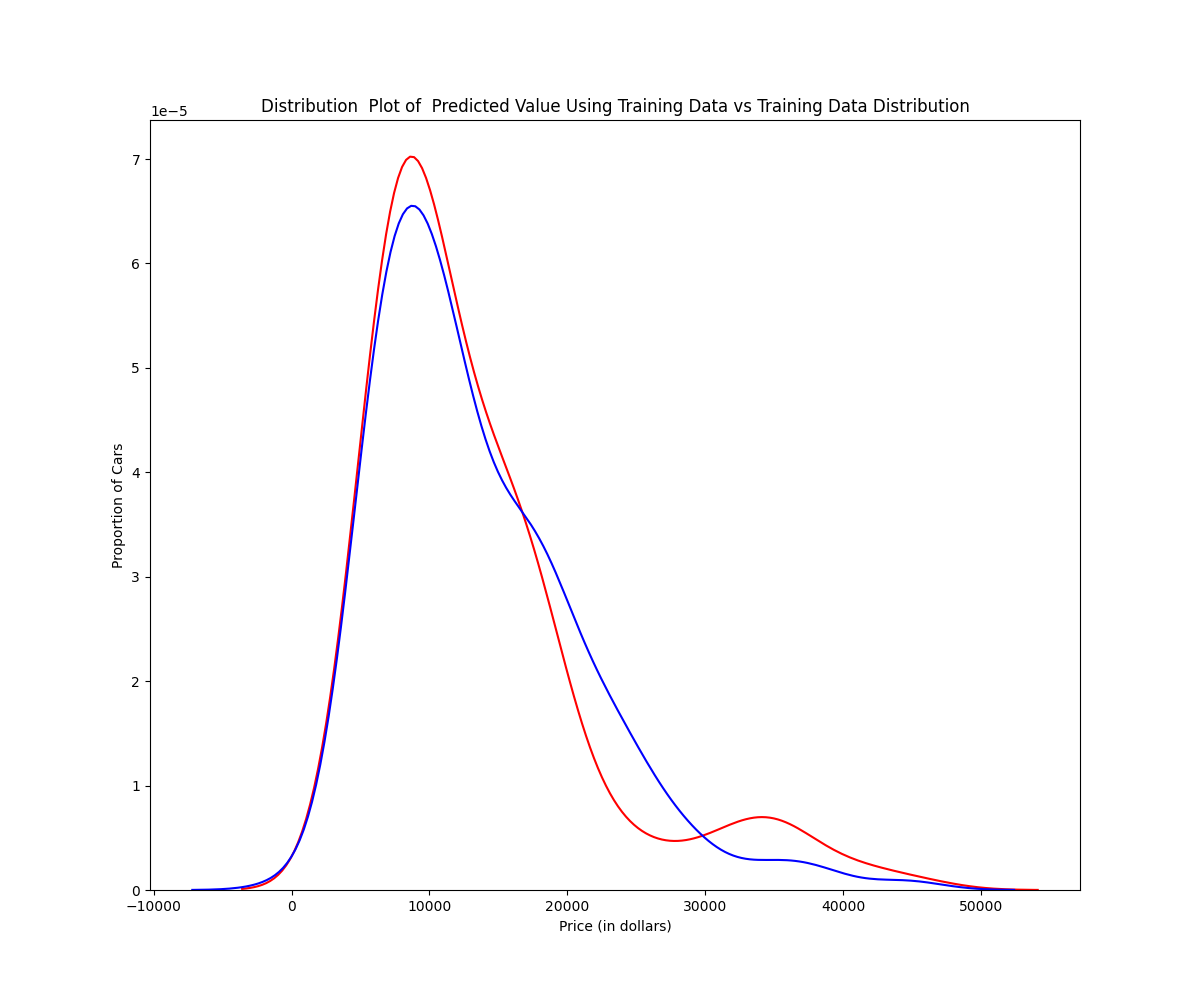

In [ ]:
Title = 'Distribution  Plot of  Predicted Value Using Training Data vs Training Data Distribution'
DistributionPlot(y_train, yhat_train, "Actual Values (Train)", "Predicted Values (Train)", Title)

Figure 1: Plot of predicted values using the training data compared to the actual values of the training data.


So far, the model seems to be doing well in learning from the training dataset. But what happens when the model encounters new data from the testing dataset? When the model generates new values from the test data, we see the distribution of the predicted values is much different from the actual target values.


<ipython-input-12-122ce36d6117>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(RedFunction, hist=False, color="r", label=RedName)
<ipython-input-12-122ce36d6117>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax2 = sns.distplot(BlueFunction, hist=False, color="b", label=BlueName, 

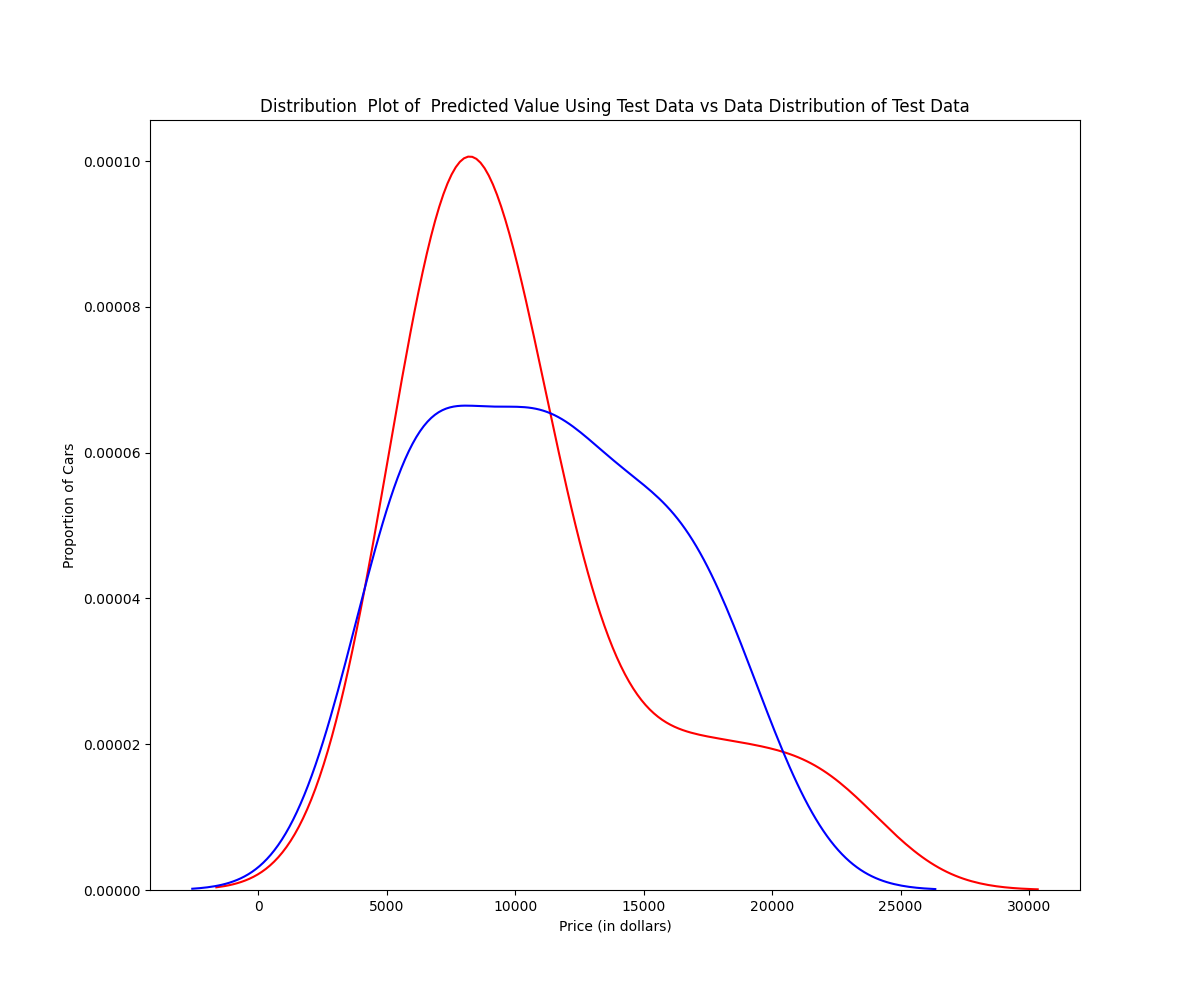

In [ ]:
Title='Distribution  Plot of  Predicted Value Using Test Data vs Data Distribution of Test Data'
DistributionPlot(y_test,yhat_test,"Actual Values (Test)","Predicted Values (Test)",Title)

Figure 2: Plot of predicted value using the test data compared to the actual values of the test data.


<p>Comparing Figure 1 and Figure 2, it is evident that the distribution of the test data in Figure 1 is much better at fitting the data. This difference in Figure 2 is apparent in the range of 5000 to 15,000. This is where the shape of the distribution is extremely different. Let's see if polynomial regression also exhibits a drop in the prediction accuracy when analysing the test dataset.</p>


In [ ]:
from sklearn.preprocessing import PolynomialFeatures

<h4>Overfitting</h4>
<p>Overfitting occurs when the model fits the noise, but not the underlying process. Therefore, when testing your model using the test set, your model does not perform as well since it is modelling noise, not the underlying process that generated the relationship. Let's create a degree 5 polynomial model.</p>


Let's use 55 percent of the data for training and the rest for testing:


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.45, random_state=0)

We will perform a degree 5 polynomial transformation on the feature <b>'horsepower'</b>.


In [ ]:
pr = PolynomialFeatures(degree=5)
x_train_pr = pr.fit_transform(x_train[['horsepower']])
x_test_pr = pr.fit_transform(x_test[['horsepower']])
pr

PolynomialFeatures(degree=5)

Now, let's create a Linear Regression model "poly" and train it.


In [ ]:
poly = LinearRegression()
poly.fit(x_train_pr, y_train)

LinearRegression()

We can see the output of our model using the method "predict." We assign the values to "yhat".


In [ ]:
yhat = poly.predict(x_test_pr)
yhat[0:5]

array([ 6728.58641321,  7307.91998787, 12213.73753589, 18893.37919224,
       19996.10612156])

Let's take the first five predicted values and compare it to the actual targets.


In [ ]:
print("Predicted values:", yhat[0:4])
print("True values:", y_test[0:4].values)

Predicted values: [ 6728.58641321  7307.91998787 12213.73753589 18893.37919224]
True values: [ 6295. 10698. 13860. 13499.]


We will use the function "PollyPlot" that we defined at the beginning of the lab to display the training data, testing data, and the predicted function.


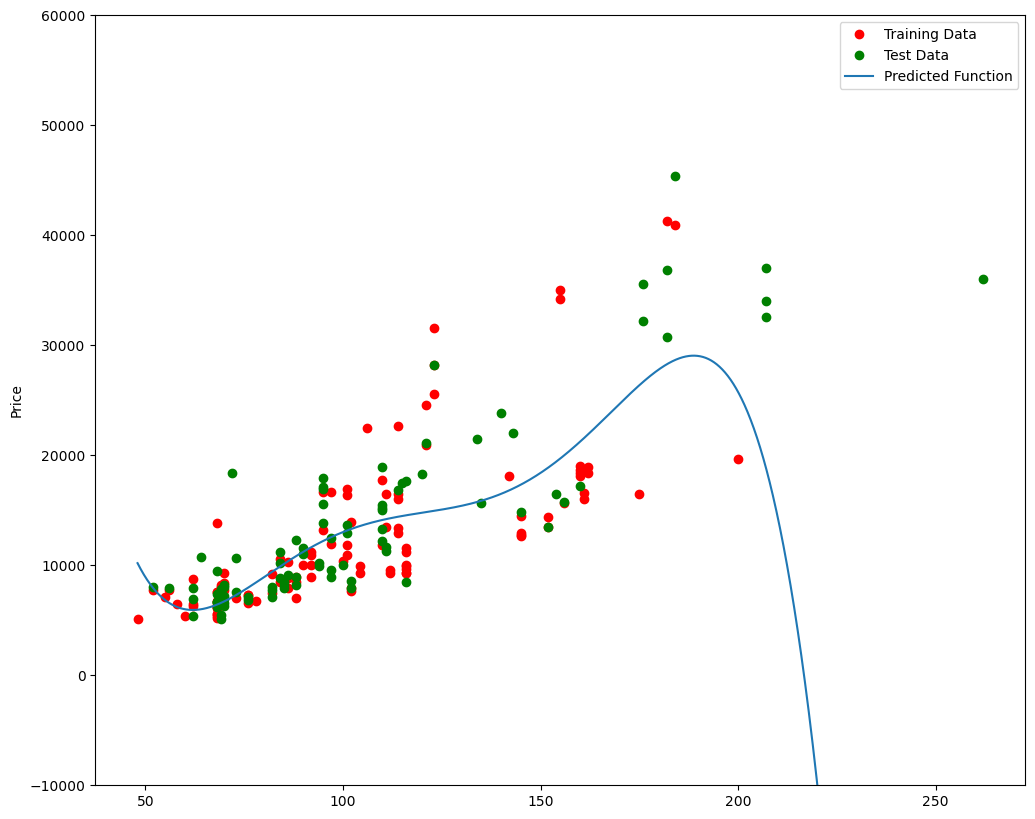

In [ ]:
PollyPlot(x_train[['horsepower']], x_test[['horsepower']], y_train, y_test, poly,pr)

Figure 3: A polynomial regression model where red dots represent training data, green dots represent test data, and the blue line represents the model prediction.


We see that the estimated function appears to track the data but around 200 horsepower, the function begins to diverge from the data points.


R^2 of the training data:


In [ ]:
poly.score(x_train_pr, y_train)

0.5567716897754004

R^2 of the test data:


In [ ]:
poly.score(x_test_pr, y_test)

-29.87099623387278

We see the R^2 for the training data is 0.5567 while the R^2 on the test data was -29.87.  The lower the R^2, the worse the model. A negative R^2 is a sign of overfitting.


Let's see how the R^2 changes on the test data for different order polynomials and then plot the results:


Text(3, 0.75, 'Maximum R^2 ')

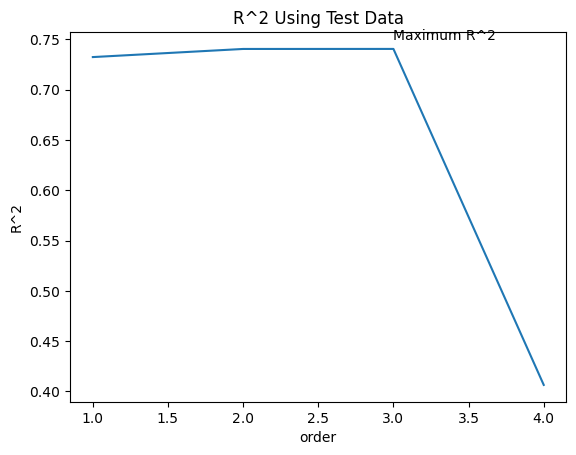

In [ ]:
Rsqu_test = []

order = [1, 2, 3, 4]
for n in order:
    pr = PolynomialFeatures(degree=n)
    
    x_train_pr = pr.fit_transform(x_train[['horsepower']])
    
    x_test_pr = pr.fit_transform(x_test[['horsepower']])    
    
    lr.fit(x_train_pr, y_train)
    
    Rsqu_test.append(lr.score(x_test_pr, y_test))

plt.plot(order, Rsqu_test)
plt.xlabel('order')
plt.ylabel('R^2')
plt.title('R^2 Using Test Data')
plt.text(3, 0.75, 'Maximum R^2 ')    

We see the R^2 gradually increases until an order three polynomial is used. Then, the R^2 dramatically decreases at an order four polynomial.


The following function will be used in the next section. Please run the cell below.


In [ ]:
def f(order, test_data):
    x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=test_data, random_state=0)
    pr = PolynomialFeatures(degree=order)
    x_train_pr = pr.fit_transform(x_train[['horsepower']])
    x_test_pr = pr.fit_transform(x_test[['horsepower']])
    poly = LinearRegression()
    poly.fit(x_train_pr,y_train)
    PollyPlot(x_train[['horsepower']], x_test[['horsepower']], y_train,y_test, poly, pr)

The following interface allows you to experiment with different polynomial orders and different amounts of data.


interactive(children=(IntSlider(value=3, description='order', max=6), FloatSlider(value=0.45, description='tes…

<function __main__.f(order, test_data)>

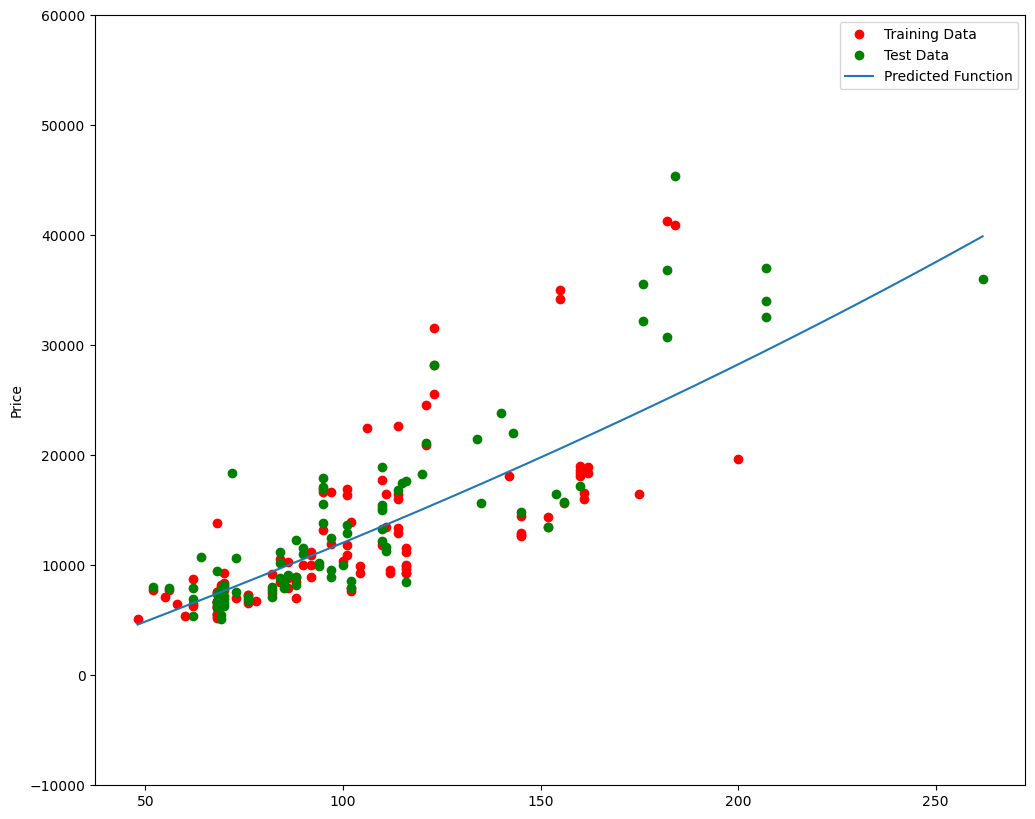

In [ ]:
interact(f, order=(0, 6, 1), test_data=(0.05, 0.95, 0.05))

<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Question  #4a):</h1>

<b>We can perform polynomial transformations with more than one feature. Create a "PolynomialFeatures" object "pr1" of degree two.</b>

</div>


In [ ]:
# Write your code below and press Shift+Enter to execute 

pr1=PolynomialFeatures(degree=2)

<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Question  #4b): </h1>

<b> 
 Transform the training and testing samples for the features 'horsepower', 'curb-weight', 'engine-size' and 'highway-mpg'. Hint: use the method "fit_transform".</b>
</div>


In [ ]:
# Write your code below and press Shift+Enter to execute 

x_train_pr1=pr1.fit_transform(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])

x_test_pr1=pr1.fit_transform(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])

<!-- The answer is below:

x_train_pr1=pr.fit_transform(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])
x_test_pr1=pr.fit_transform(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])

-->


<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Question  #4c): </h1>
<b> 
How many dimensions does the new feature have? Hint: use the attribute "shape".
</b>
</div>


In [ ]:
# Write your code below and press Shift+Enter to execute 

x_train_pr1.shape #there are now 15 features

(110, 15)

<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Question  #4d): </h1>

<b> 
Create a linear regression model "poly1". Train the object using the method "fit" using the polynomial features.</b>
</div>


In [ ]:
# Write your code below and press Shift+Enter to execute 

poly1=LinearRegression().fit(x_train_pr1,y_train)

 <div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Question  #4e): </h1>
<b>Use the method  "predict" to predict an output on the polynomial features, then use the function "DistributionPlot" to display the distribution of the predicted test output vs. the actual test data.</b>
</div>


<ipython-input-12-122ce36d6117>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(RedFunction, hist=False, color="r", label=RedName)
<ipython-input-12-122ce36d6117>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax2 = sns.distplot(BlueFunction, hist=False, color="b", label=BlueName, 

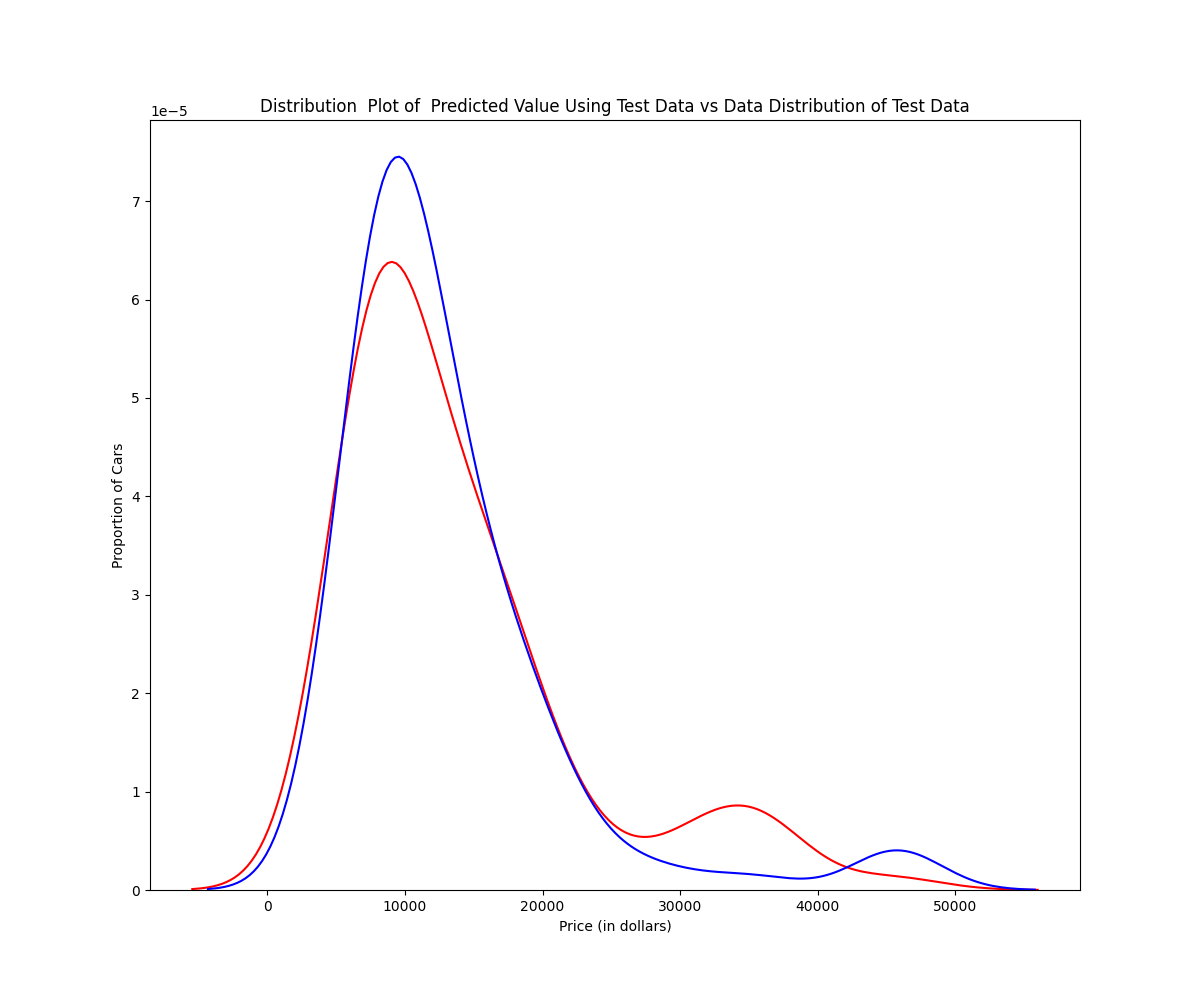

In [ ]:
# Write your code below and press Shift+Enter to execute 

yhat_test1=poly1.predict(x_test_pr1)

Title='Distribution  Plot of  Predicted Value Using Test Data vs Data Distribution of Test Data'

DistributionPlot(y_test, yhat_test1, "Actual Values (Test)", "Predicted Values (Test)", Title)

<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Question  #4f): </h1>

<b>Using the distribution plot above, describe (in words) the two regions where the predicted prices are less accurate than the actual prices.</b>

</div>


In [ ]:
# Write your code below and press Shift+Enter to execute 

#El valor pronosticado es más alto que el valor real para automóviles en los que el rango de precio es de $10 000; por el contrario, el precio pronosticado es más bajo que el costo del precio en el rango de $30 000 a $40 000. Como tal, el modelo no es tan preciso en estos rangos.

<h2 id="ref3">Part 3: Ridge Regression</h2> 


In this section, we will review Ridge Regression and see how the parameter alpha changes the model. Just a note, here our test data will be used as validation data.


Let's perform a degree two polynomial transformation on our data.


In [ ]:
pr=PolynomialFeatures(degree=2)
x_train_pr=pr.fit_transform(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg','normalized-losses','symboling']])
x_test_pr=pr.fit_transform(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg','normalized-losses','symboling']])

Let's import  <b>Ridge</b>  from the module <b>linear models</b>.


In [ ]:
from sklearn.linear_model import Ridge

Let's create a Ridge regression object, setting the regularization parameter (alpha) to 0.1


In [ ]:
RigeModel=Ridge(alpha=1)

Like regular regression, you can fit the model using the method <b>fit</b>.


In [ ]:
RigeModel.fit(x_train_pr, y_train)

Ridge(alpha=1)

Similarly, you can obtain a prediction:


In [ ]:
yhat = RigeModel.predict(x_test_pr)

Let's compare the first five predicted samples to our test set:


In [ ]:
print('predicted:', yhat[0:4])
print('test set :', y_test[0:4].values)

predicted: [ 6570.82441941  9636.24891471 20949.92322738 19403.60313255]
test set : [ 6295. 10698. 13860. 13499.]


We select the value of alpha that minimizes the test error. To do so, we can use a for loop. We have also created a progress bar to see how many iterations we have completed so far.


In [ ]:
from tqdm import tqdm

Rsqu_test = []
Rsqu_train = []
dummy1 = []
Alpha = 10 * np.array(range(0,1000))
pbar = tqdm(Alpha)

for alpha in pbar:
    RigeModel = Ridge(alpha=alpha) 
    RigeModel.fit(x_train_pr, y_train)
    test_score, train_score = RigeModel.score(x_test_pr, y_test), RigeModel.score(x_train_pr, y_train)
    
    pbar.set_postfix({"Test Score": test_score, "Train Score": train_score})

    Rsqu_test.append(test_score)
    Rsqu_train.append(train_score)

<ipython-input-62-e0c60797668d>:7: TqdmMonitorWarning: tqdm:disabling monitor support (monitor_interval = 0) due to:
can't start new thread
  pbar = tqdm(Alpha)
100%|##########| 1000/1000 [00:10<00:00, 96.85it/s, Test Score=0.564, Train Score=0.859]


We can plot out the value of R^2 for different alphas:


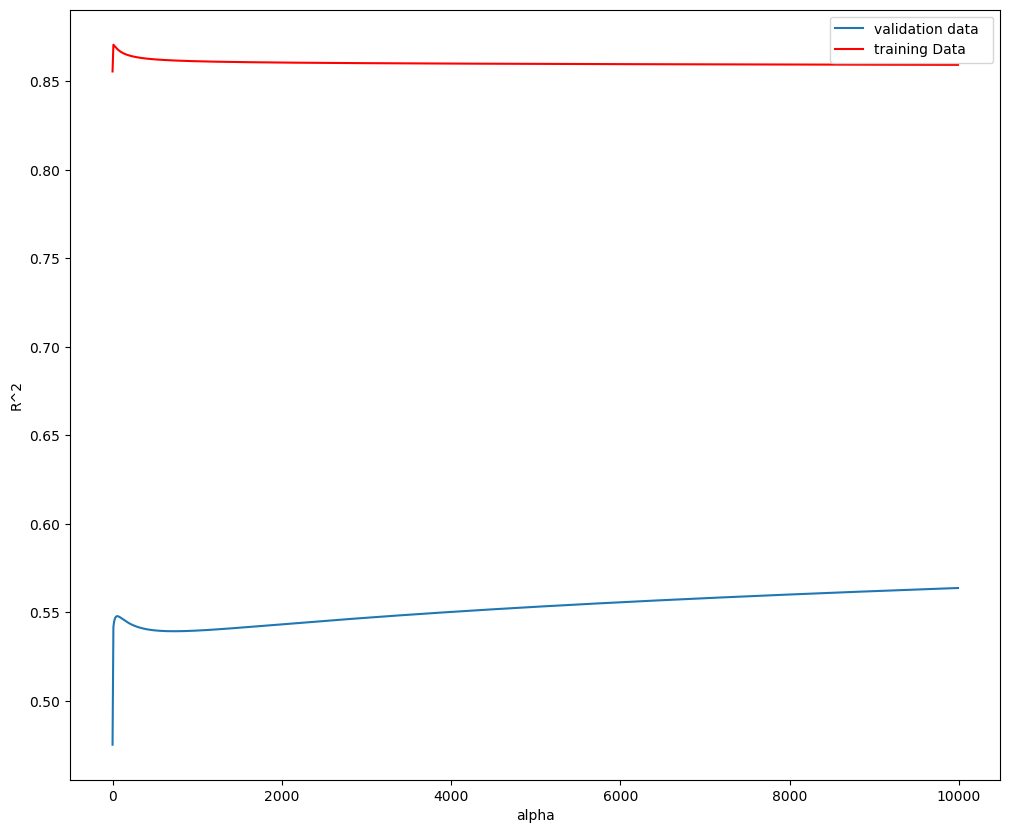

In [ ]:
width = 12
height = 10
plt.figure(figsize=(width, height))

plt.plot(Alpha,Rsqu_test, label='validation data  ')
plt.plot(Alpha,Rsqu_train, 'r', label='training Data ')
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.legend()

**Figure 4**: The blue line represents the R^2 of the validation data, and the red line represents the R^2 of the training data. The x-axis represents the different values of Alpha.


Here the model is built and tested on the same data, so the training and test data are the same.

The red line in Figure 4 represents the R^2 of the training data. As alpha increases the R^2 decreases. Therefore, as alpha increases, the model performs worse on the training data

The blue line represents the R^2 on the validation data. As the value for alpha increases, the R^2 increases and converges at a point.


<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Question  #5): </h1>

Perform Ridge regression. Calculate the R^2 using the polynomial features, use the training data to train the model and use the test data to test the model. The parameter alpha should be set to 10.

</div>


In [ ]:
# Write your code below and press Shift+Enter to execute 

RigeModel = Ridge(alpha=10) 
RigeModel.fit(x_train_pr, y_train)
RigeModel.score(x_test_pr, y_test)

0.5418576440208844

<h2 id="ref4">Part 4: Grid Search</h2>


The term alpha is a hyperparameter. Sklearn has the class <b>GridSearchCV</b> to make the process of finding the best hyperparameter simpler.


Let's import <b>GridSearchCV</b> from  the module <b>model_selection</b>.


In [ ]:
from sklearn.model_selection import GridSearchCV

We create a dictionary of parameter values:


In [ ]:
parameters1= [{'alpha': [0.001,0.1,1, 10, 100, 1000, 10000, 100000, 100000]}]
parameters1

[{'alpha': [0.001, 0.1, 1, 10, 100, 1000, 10000, 100000, 100000]}]

Create a Ridge regression object:


In [ ]:
RR=Ridge()
RR

Ridge()

Create a ridge grid search object:


In [ ]:
Grid1 = GridSearchCV(RR, parameters1,cv=4)

Fit the model:


In [ ]:
Grid1.fit(x_data[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_data)

GridSearchCV(cv=4, estimator=Ridge(),
             param_grid=[{'alpha': [0.001, 0.1, 1, 10, 100, 1000, 10000, 100000,
                                    100000]}])

The object finds the best parameter values on the validation data. We can obtain the estimator with the best parameters and assign it to the variable BestRR as follows:


In [ ]:
BestRR=Grid1.best_estimator_
BestRR

Ridge(alpha=10000)

We now test our model on the test data:


In [ ]:
BestRR.score(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_test)

0.8411649831036152

#**Resultados de evaluaciones y progreso**

### Progreso

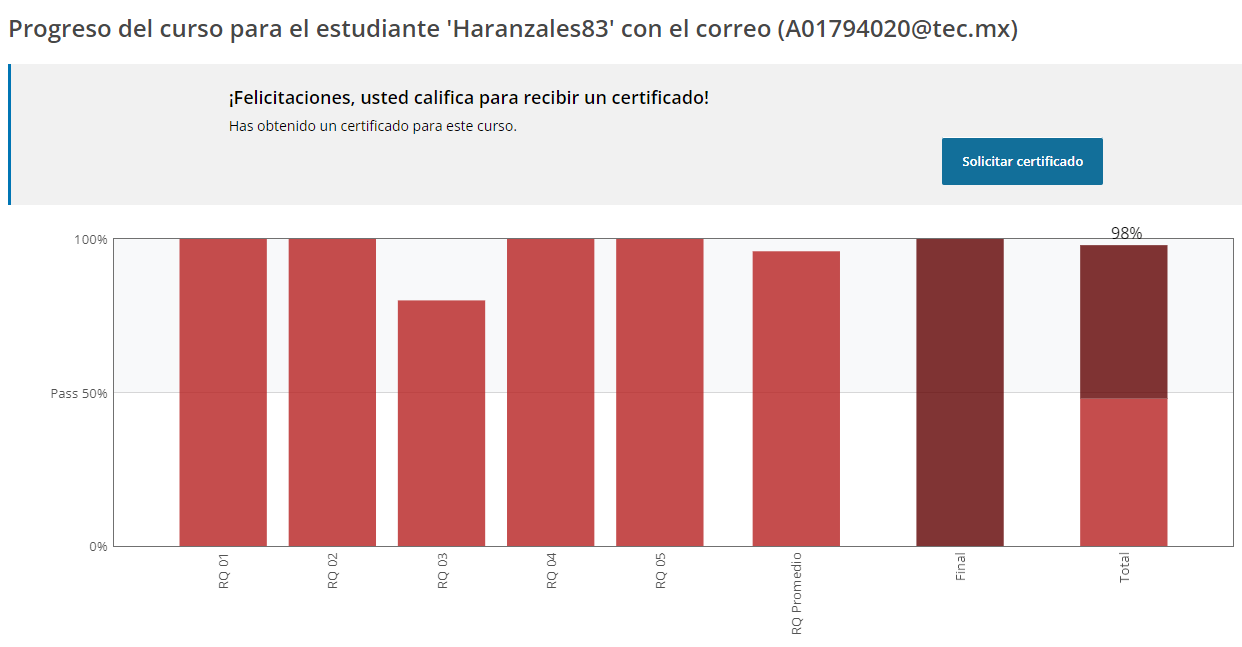

### Preguntas de evaluación

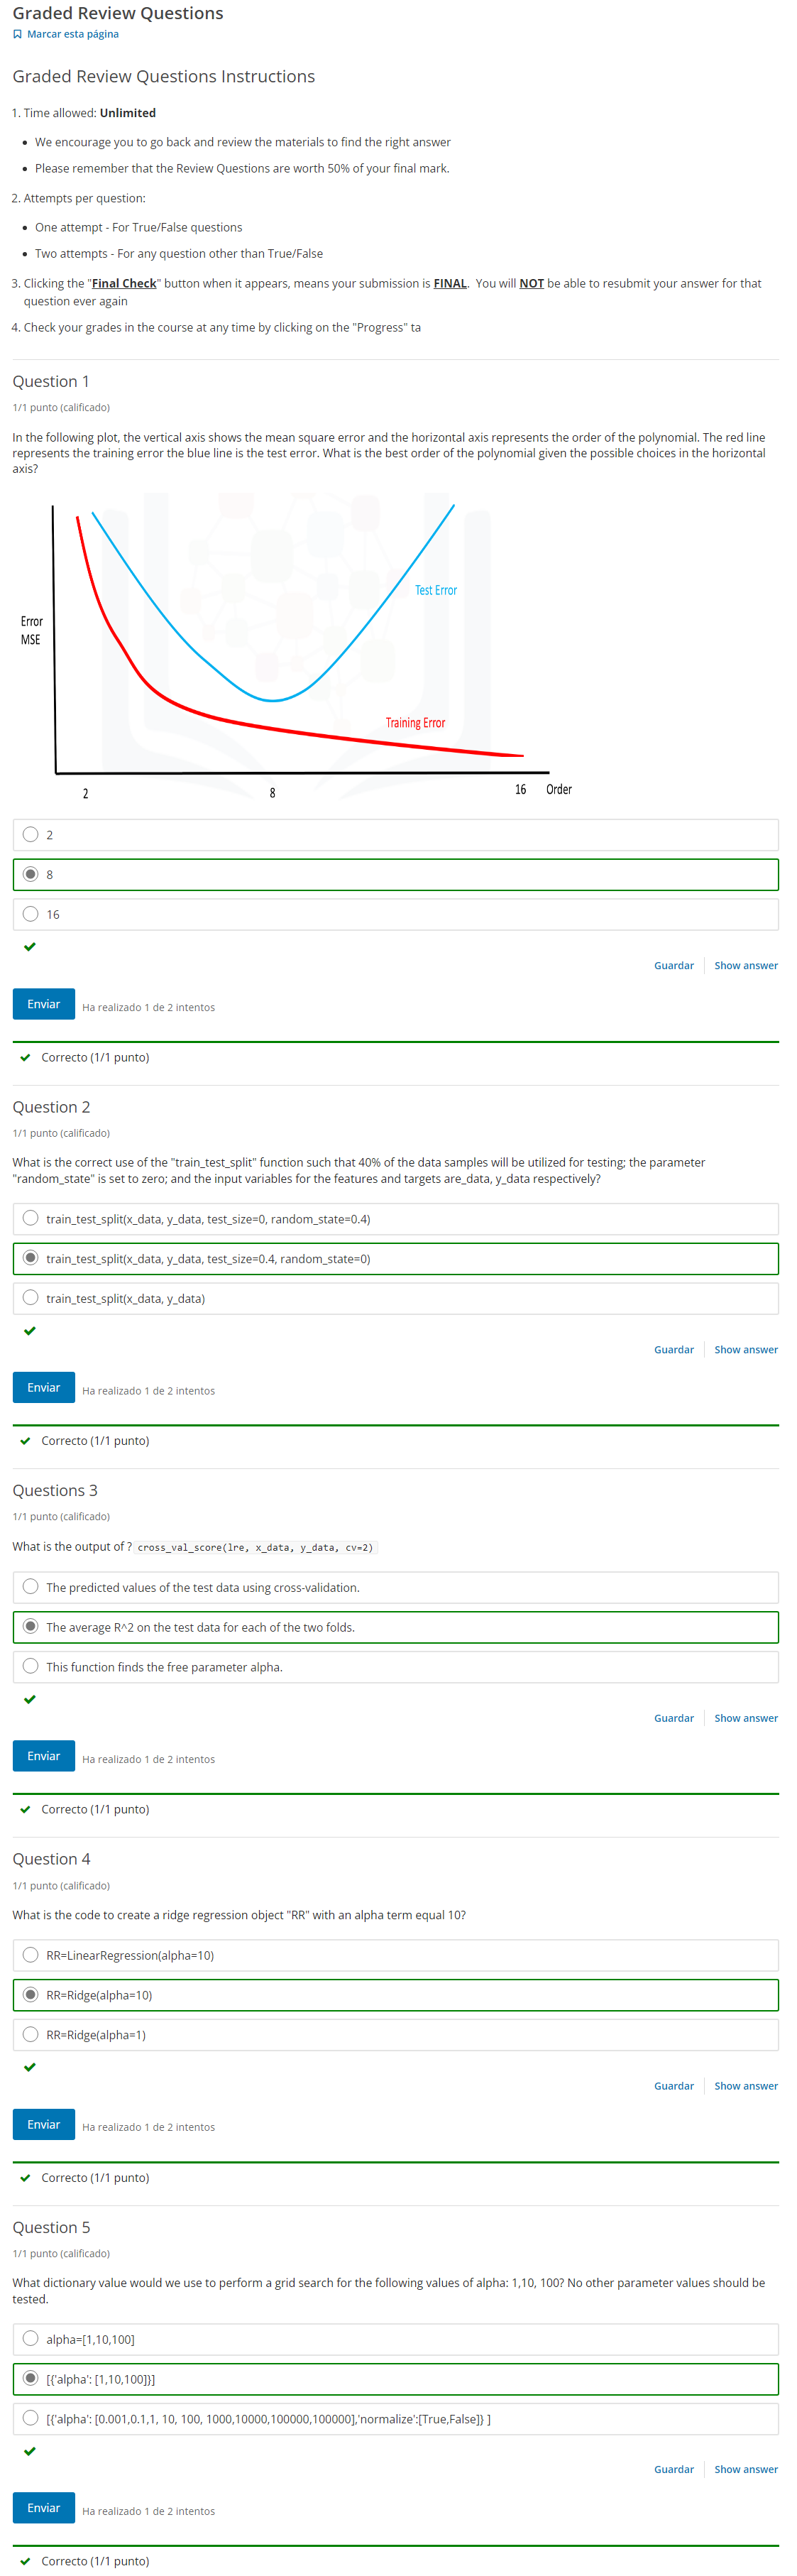

#**Resultados finales del curso**

### Certificado

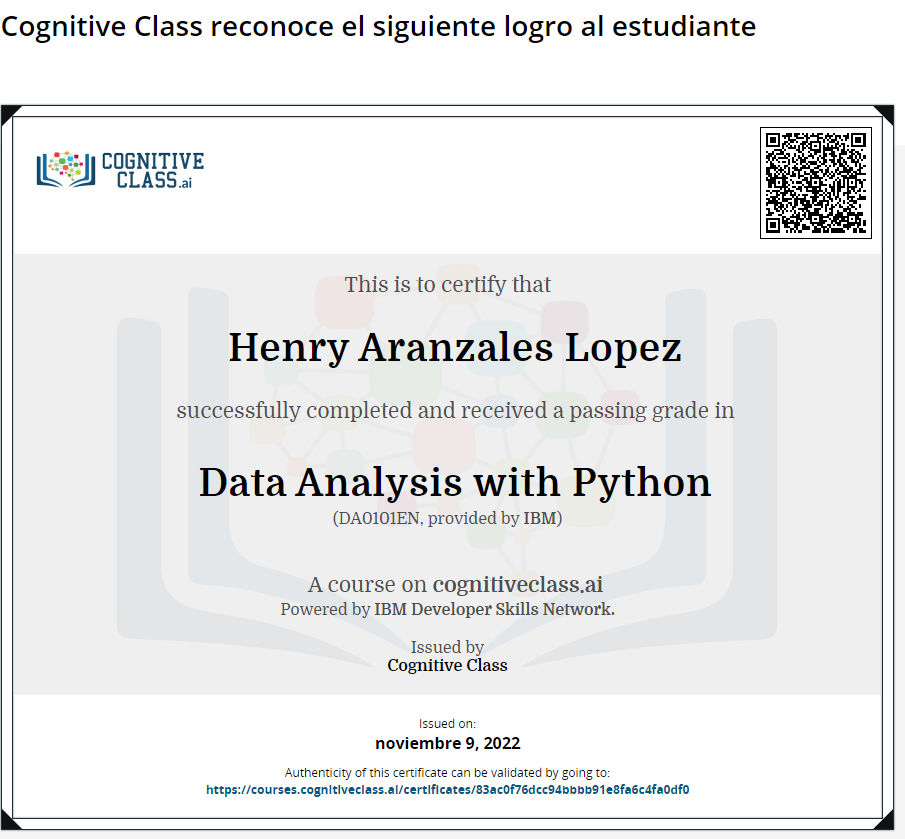

### Preguntas de evaluación final

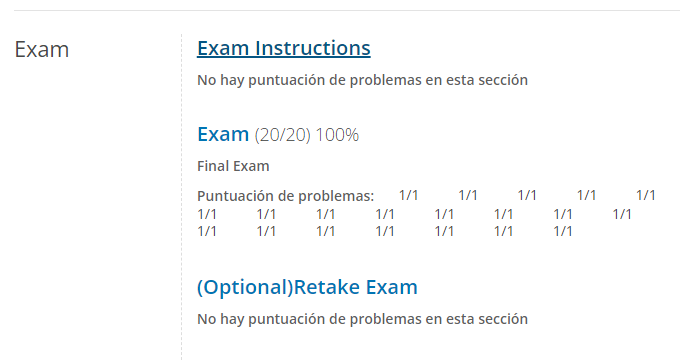